In [1]:
import numpy as np

# Loading the dataset
dataset = np.load('qm7x_eq.npz', allow_pickle=True)

# What is inside?
for f in dataset.files:
    print(f)

EAT
S
xyz
Z


In [2]:
# Importing data
EAT = dataset['EAT'] # atomization energy
xyz = dataset['xyz'] # Cartesian coordinates
Z = dataset['Z'] # atomic indexes

n_molecules = len(xyz)
print('The number of molecules in the dataset is {:d}.'.format(n_molecules))

The number of molecules in the dataset is 41537.


In [3]:
from tqdm import tqdm
from scipy.spatial.distance import pdist

# Descriptor
def descriptor(R):
    
    nconfig = len(R)
    D = []
    for i in tqdm(range(nconfig)):
        D.append(1./pdist(R[i]))
    
    return D

d = descriptor(xyz)

# Making all descriptor entries of the same size
max_size = np.max([len(_) for _ in d])
nconfig = len(d)
D = np.zeros((nconfig, max_size))

for i in range(nconfig):
    size = len(d[i])
    D[i, :size] = d[i]

100%|█████████████████████████████████| 41537/41537 [00:00<00:00, 115974.54it/s]


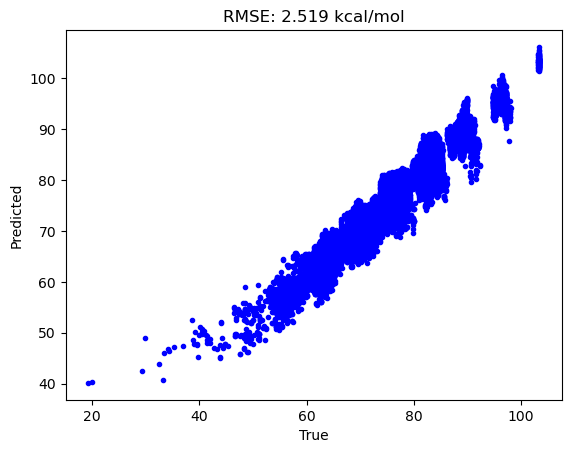

In [13]:
from sklearn import linear_model
import matplotlib.pyplot as plt

# ridge regression
reg = linear_model.Ridge(alpha=1e-8)
reg.fit(D, EAT)

rmse = np.sqrt(np.square(EAT - reg.predict(D)).mean())
plt.title('RMSE: {:.3f} kcal/mol'.format(rmse))
plt.scatter(EAT, reg.predict(D), marker='.', color='blue')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

100%|█████████████████████████████████| 41537/41537 [00:00<00:00, 159347.10it/s]


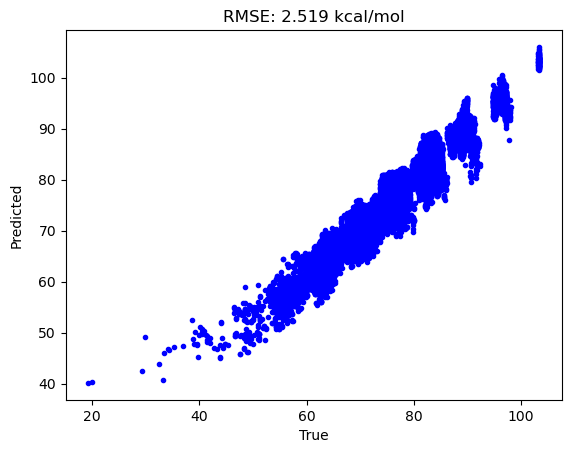

In [9]:
import numpy as np
from tqdm import tqdm
from scipy.spatial.distance import pdist
from sklearn import linear_model
import matplotlib.pyplot as plt

# Loading the dataset
dataset = np.load('qm7x_eq.npz', allow_pickle=True)

# Importing data
EAT = dataset['EAT'] # atomization energy
xyz = dataset['xyz'] # Cartesian coordinates
Z = dataset['Z'] # atomic indexes

# Descriptor
def descriptor(R):
    
    nconfig = len(R)
    D = []
    for i in tqdm(range(nconfig)):
        D.append(1./pdist(R[i]))
    
    return D

d = descriptor(xyz)

# Making all descriptor entries of the same size
max_size = np.max([len(_) for _ in d])
nconfig = len(d)
D = np.zeros((nconfig, max_size))

for i in range(nconfig):
    size = len(d[i])
    D[i, :size] = d[i]
    

# ridge regression
reg = linear_model.Ridge(alpha=1e-8)
reg.fit(D, EAT)

rmse = np.sqrt(np.square(EAT - reg.predict(D)).mean())
plt.title('RMSE: {:.3f} kcal/mol'.format(rmse))
plt.scatter(EAT, reg.predict(D), marker='.', color='blue')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

### Using Feature Scaling with `StandardScaler`

#### **Why?**
Ridge Regression is sensitive to the scale of the input features because the regularization term depends on the size of coefficients. Standardizing features ensures each feature contributes equally to the model.

#### **How it works:**
- Each feature is rescaled to have a **mean of 0** and a **standard deviation of 1**.
- This prevents features with larger magnitudes from dominating the regression model.

#### **Mathematical Representation:**
$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ = Original feature value  
- $\mu$ = Mean of the feature  
- $\sigma$ = Standard deviation of the feature


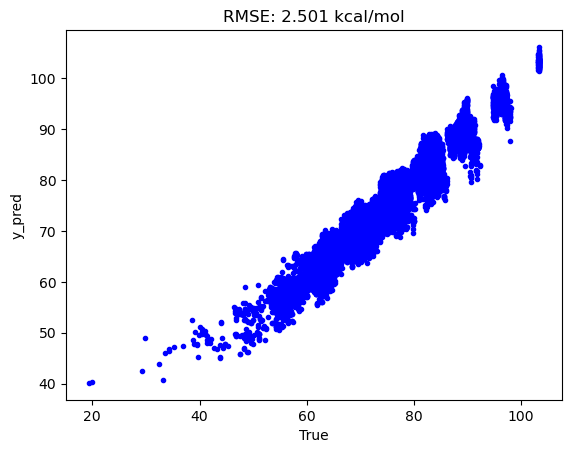

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(D, EAT, test_size=0.2, random_state=42)

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression without hyperparameter tuning
ridge = Ridge(alpha=1.0)  # Default alpha
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge.predict(X_test_scaled)

# RMSE Calculation
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"RMSE after Feature Scaling: {rmse_scaled:.3f} kcal/mol")
plt.title('RMSE: {:.3f} kcal/mol'.format(rmse_scaled))
plt.scatter(EAT, reg.predict(D), marker='.', color='blue')
plt.xlabel('True')
plt.ylabel('y_pred')
plt.show()

#### **Effect:**

- **Before scaling**: RMSE ≈ **2.519 kcal/mol**  
- **After scaling**: RMSE reduced to ≈ **2.501 kcal/mol**